<a href="https://colab.research.google.com/github/sueholtsclaw/New-Cats/blob/master/Automation_Using_Python_Workbook_v1_3_1_EN_29th_Nov_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Meraki Automation using Python Workshop Workbook**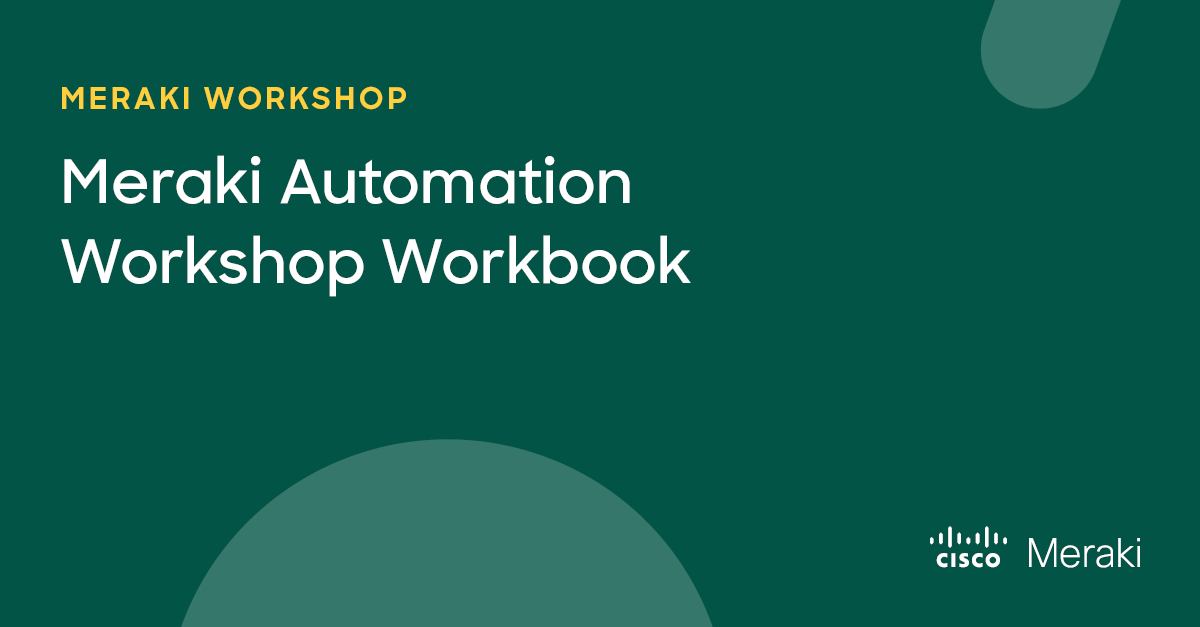

# **Complete ALL STEPS in order without skipping any.**

# **Create a copy and Rename it**

Start by **creating a copy** of the workbook and then **rename** it.

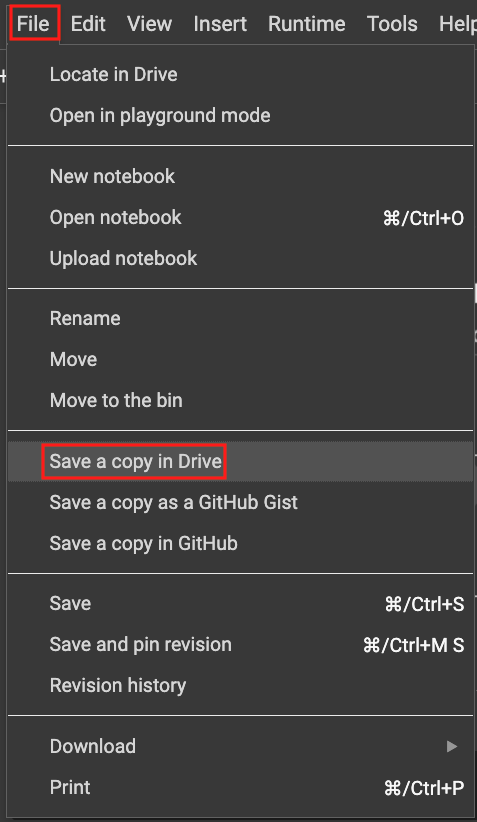

Next, **Clear all ouputs** and work on the copy as shown below.

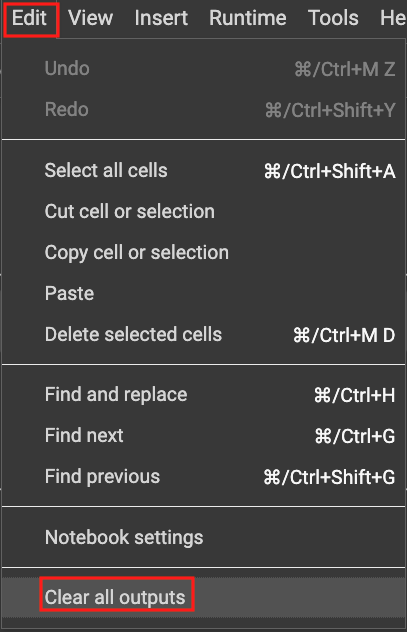


# **Variables and Data Types**



Terminology:

- Variable = A container to store value/data in Python

- Data Type = Type of data that Python can natively process

There are various different data types in Python but we will be focusing on the most important ones that you will be using with Meraki API calls. To check the data type of any data stored in a variable, you can simply pass the variable as an input to an inbuilt type() function.

1. Interger
```
var = 10
type(var)
```

2. Floating Point
```
var = 70.55
type(var)
```

3. Boolean
```
var = True
type(var)
```

4. String
```
var = 'Meraki'
type(var)
```

5. List
```
var = [10, 70.55, 'Meraki']
type(var)
```

6. Dictionary
```
var = {'vlan': 10, 'name': 'Corp'}
type(var)
```




# **Installing Meraki Library**


Install the **Meraki Python library**, copy-paste the following code or type it in the code block below and run it.

Installing Meraki library will install Requests library by default so you dont have to explicitly install Request Library.



```
pip install meraki
```










# **Meraki Library**

Copy the code for Get Organizations API call from **Meraki Python Library** tab of the API docs and paste it into the code block below.

[GET Organizations Request](https://developer.cisco.com/meraki/api-v1/#!get-organizations)


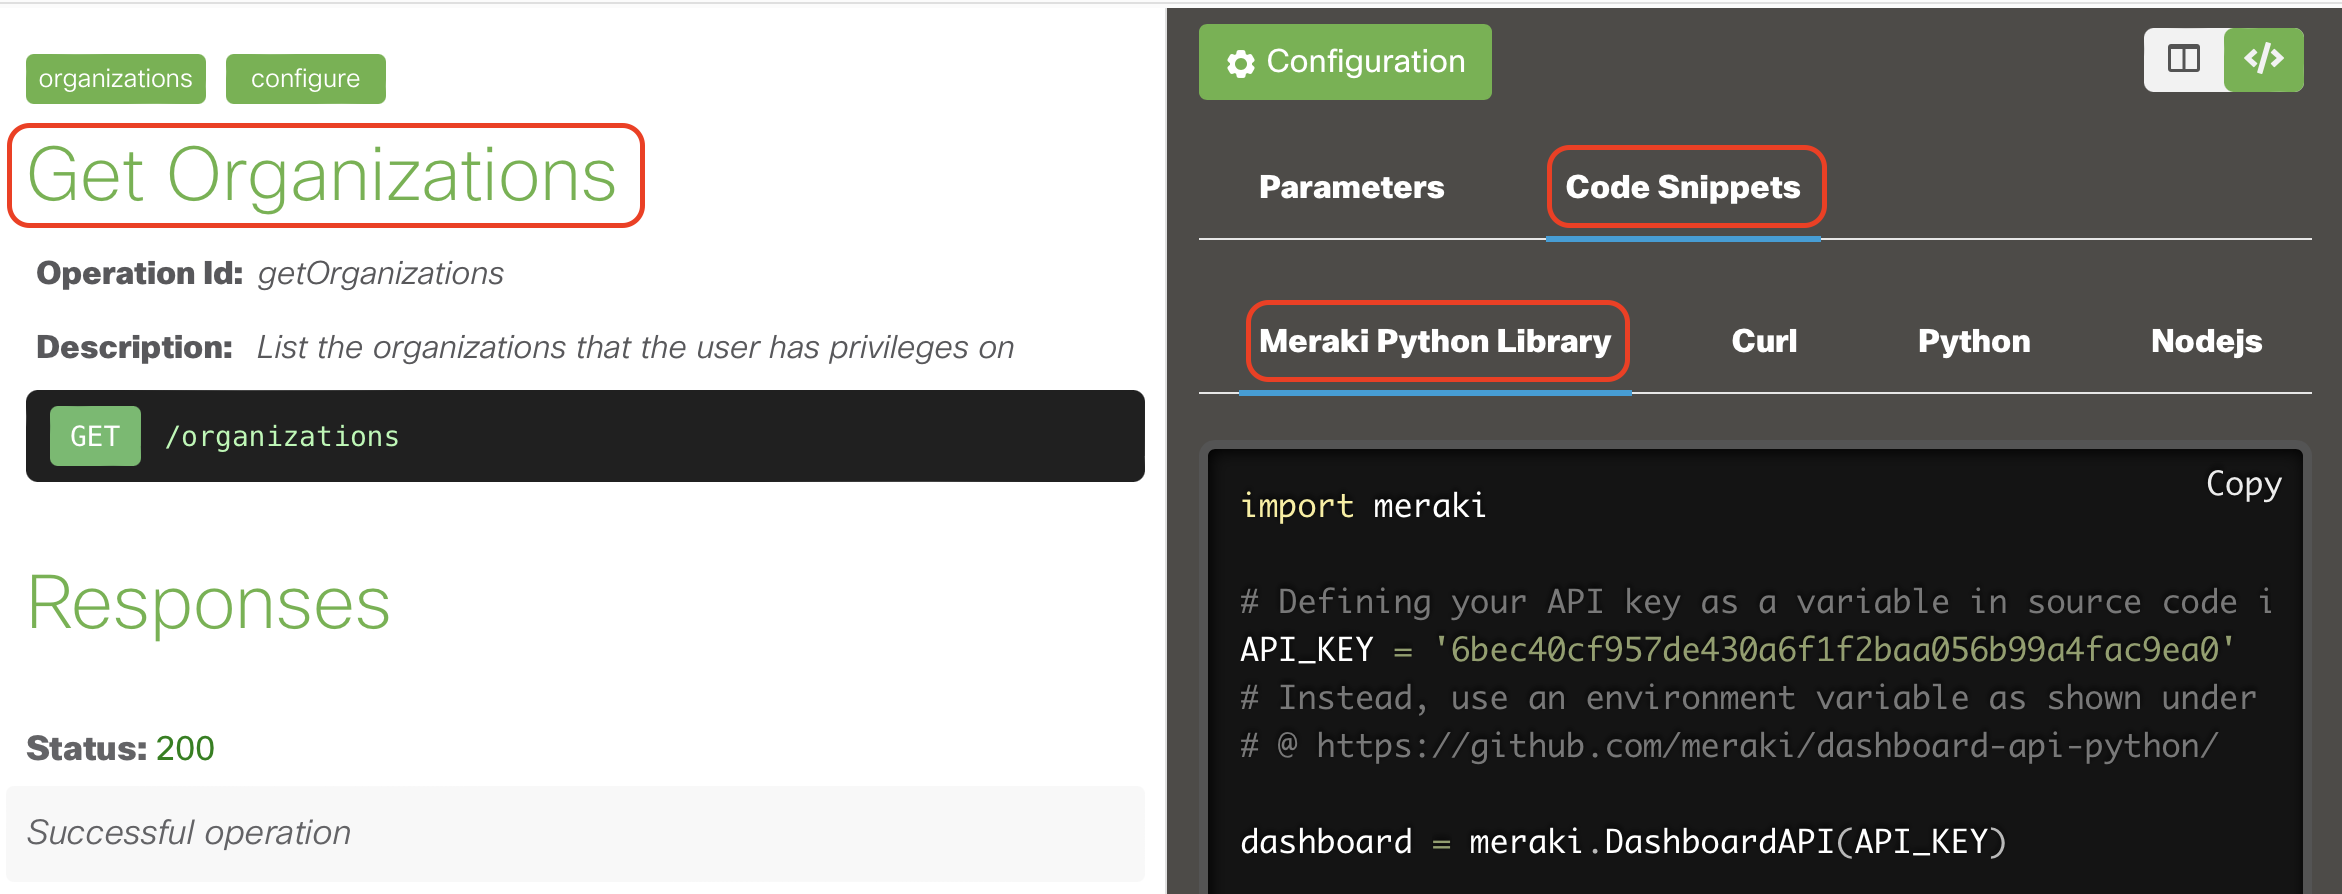

# **Let's Build a Simple Script Together**







A customer wants to get the status of all their wireless access points in a given dashboard organization. To make the output a little bit more readable and organized, the display should be in a tabular format.



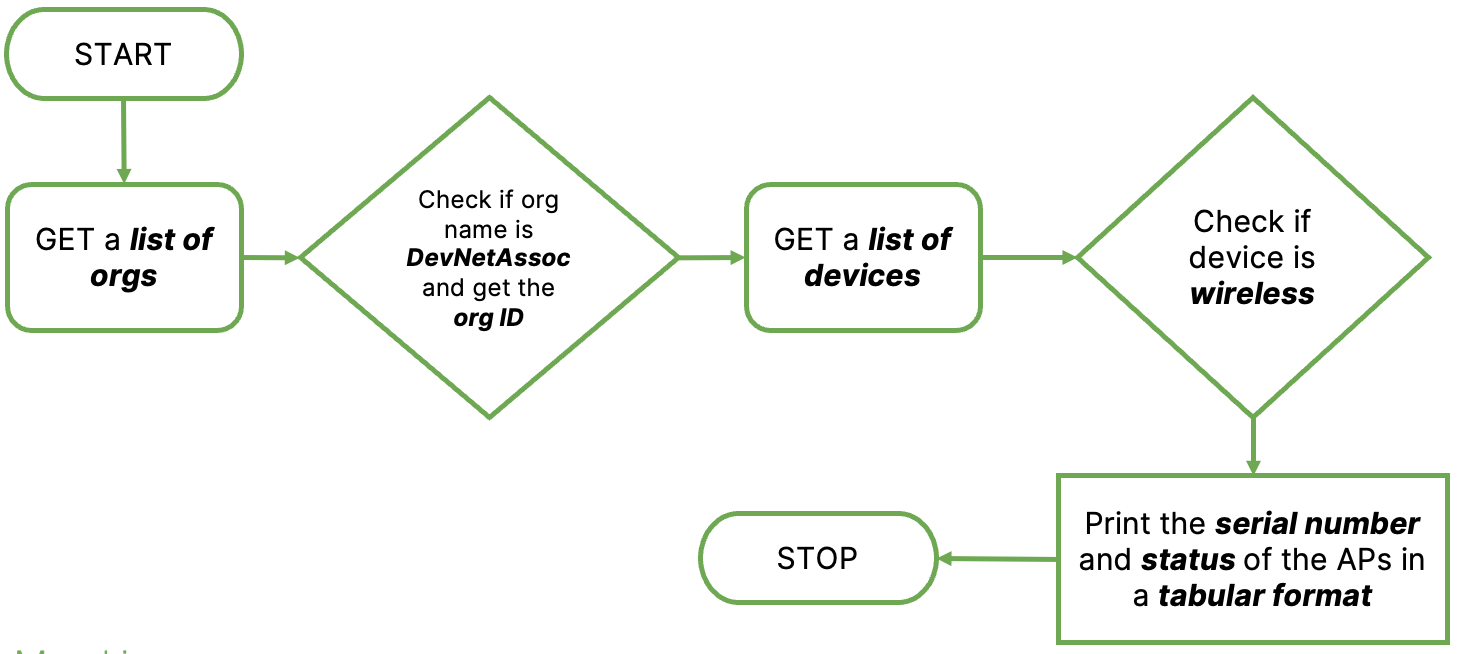

# **Get a List of Organizations**


First step is to get a list of all dashboard organizations that the API key is associated with along with its key information that we will use later in the script like Org ID for example.

```
import meraki
from prettytable import PrettyTable
import json

API_KEY = '6bec40cf957de430a6f1f2baa056b99a4fac9ea0'
dashboard = meraki.DashboardAPI(API_KEY)

list_of_orgs = dashboard.organizations.getOrganizations()
print(list_of_orgs)
```

The output of this code will display a list of organizations in one line which is not easy to read. You can format it in a user-friendly and readable manner by importing json library and modifying the print statement as follows:



```
print(json.dumps(list_of_orgs, indent=4))
```

We now have a list of organizations stored into a variable called ***`list_of_orgs`***.









# **Find a Specific Organization and Org ID**


What we need now is to search for a specific organization called ***`DevNetAssoc`*** and get its organization ID (or ***`Org ID`***).

For this we will use a combination of for loop and if-else statement to iterate through each org in search of DevNetAssoc and once found get its org ID.

```
for org in list_of_orgs:
    if org['name'] == 'DevNetAssoc':
        organization_id = org['id']

print(organization_id)
```

The output of this code will display a the org ID of DevNetAssoc organization which is stored in a variable called ***`organization_id`***.










# **Get a List of Devices and Status**


With the help of org ID retrieved in previous step, we can now get access to all the devices claimed into DevNetAssoc organization along with information on their status (online, offline, alerting, or dormant) among other things.

We can use [this](https://developer.cisco.com/meraki/api-v1/#!get-organization-devices-availabilities) API endpoint to get that info.

```
list_of_devices = dashboard.organizations.getOrganizationDevicesAvailabilities(
    organization_id, total_pages='all')

print(list_of_devices)
```

The output of this code will display a list of all the devices in DevNetAssoc organization along with its basic info like serial number and status. We now have this data stored in a variable called ***`list_of_devices`***.










# **Check If a Device is Wireless**


As per the requirement, we only need the data (specifically ***`serial number`*** and ***`status`***) about wireless Access Points in the DevNetAssoc organization. The requirement also states that the final output should be displayed in a tabular format for readability.

First we should start defining the structure of the table and then add required info by filtering the data to only match wireless Access Points.

```
table = PrettyTable(['Serial', 'Status'])

for device in list_of_devices:
    if device['productType'] == 'wireless':
        table.add_row([device['serial'], device['status']])

print(table)
```

The output of this code will display a list of all the wireless Access Points in DevNetAssoc organization represented by their serial numbers and statuses. We now have this data stored in a variable called ***`table`***.










# **Bringing It All Together**


This is what the whole script looks like.

```
import meraki
from prettytable import PrettyTable
import json

API_KEY = '6bec40cf957de430a6f1f2baa056b99a4fac9ea0'
dashboard = meraki.DashboardAPI(API_KEY)

list_of_orgs = dashboard.organizations.getOrganizations()

for org in list_of_orgs:
    if org['name'] == 'DevNetAssoc':
        organization_id = org['id']

list_of_devices = dashboard.organizations.getOrganizationDevicesAvailabilities(
    organization_id, total_pages='all')

table = PrettyTable(['Serial', 'Status'])

for device in list_of_devices:
    if device['productType'] == 'wireless':
        table.add_row([device['serial'], device['status']])

print(table)
```










# **Python Functions**


A function is used to modularize a script into individual blocks of organized and reusable code that performs a single specific action.

For example, you can create two separate functions:
1. get_org_id() - Get org ID for a specific organization
2. get_network_id() - Get network ID for a specific network within that organization

This is beneficial because once you define these two functions, you can always reuse them anywhere within the same or a different script without needing to type it from scratch or copy-paste the code.

```
import meraki

API_KEY = '6bec40cf957de430a6f1f2baa056b99a4fac9ea0'
dashboard = meraki.DashboardAPI(API_KEY)
org_name_to_find = 'DevNetAssoc'
net_name_to_find = 'DevNetAssoc1'

def get_org_id(org_name_to_find):

    list_of_orgs = dashboard.organizations.getOrganizations()
    
    for org in list_of_orgs:
        if org['name'] == org_name_to_find:
            return org['id']

def get_network_id(org_id, net_name_to_find):

    list_of_networks = dashboard.organizations.getOrganizationNetworks(
        org_id, total_pages='all')
    
    for net in list_of_networks:
        if net['name'] == net_name_to_find:
            return net['id']

organization_id = get_org_id(org_name_to_find)
network_id = get_network_id(organization_id, net_name_to_find)

print(f'Organization ID: {organization_id}')
print(f'Network ID: {network_id}')
```



The output of this code will display the organization ID of *DevNetAssoc* organization and network ID of *DevNetAssoc1* network within. Both are stored in variables called ***`organization_id`*** and ***`network_id`*** respectively.

You can update the following variables in the script to match with your dashboard information and give it a try:
1. ***`API_KEY`*** - Define your own API key
2. ***`org_name_to_find`*** - Define the name of the organization in question
3. ***`net_name_to_find`*** - Define the name of the network in question










# **Reading From a CSV File**


Sometimes you may have to process some data from a CSV file like for example adding Meraki devices from inventory CSV file to a specific network. However, you dont need the whole content of the CSV file to make that happen. You only need serial numbers from that file to claim.

Fortunately, Python already has an inbuilt CSV library to help you do exactly that. But first, we need to upload a CSV file from the inventory page of any given dashboard organization to this Google Colab environment.

Download "Sample_Inventory.csv" file from the link below,

https://drive.google.com/file/d/1x-eaxCo6IGUChRhero_OfObnN-N4EFOA/view?usp=share_link

Click on the folder icon on the left and then drag & drop the CSV file there.

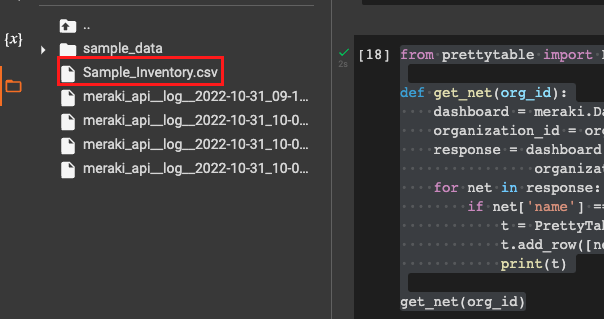



With the CSV file already uploaded, the following code allows you to specifically extract a list of serial numbers.

```
import csv

serials = []

with open('Sample_Inventory.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        serials.append(row['serial_number'])

print(serials)
```

The output of this code will display a list of serial numbers stored in a variable called ***`serials`***. We wont discuss the code for adding the devices into a network here but maybe thats a good project for you to work on your own.

Hint: Use [this](https://developer.cisco.com/meraki/api-v1/#!claim-network-devices) API endpoint.










# **Congratulations! You have now completed the lab.**